# Super resolution of facial images via PCA

## Libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from pathlib import Path
from PIL import Image
import glob
import os

%matplotlib inline

## Parameters

In [2]:
N_img = 1000
N_test_img = 10
test_start_idx = N_img + 1
pca_n_components = 100
img_size_large = 178
img_size_small = 16

## Image settings

In [3]:
img_dir_path = os.path.join(
    Path('./img_align_celeba'),
    Path('img_align_celeba')
)
out_dir_path = Path('out_img')
train_imgs = list()
for i in range(N_img):
    img_name = str(i+1).zfill(6) + '.jpg'
    train_imgs.append(
        os.path.join(
            img_dir_path,
            img_name
        )
    )
test_imgs = list()
for i in range(N_test_img):
    test_img_name = str(i+test_start_idx).zfill(6) + '.jpg'
    test_imgs.append(
        os.path.join(
            img_dir_path, 
            test_img_name
        )
    )

In [4]:
def img_preprocess(img_path, img_size=img_size_large, is_input_path=True):
    if is_input_path:
        img = Image.open(img_path)
    else:
        img = img_path
    img = img.convert('L')
    img = img.resize((img_size, img_size))
    array_img = np.asarray(img)
    array_img = array_img / 255.0
    return array_img

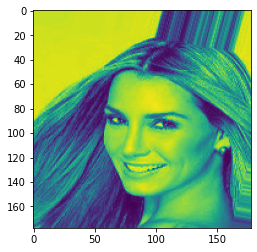

(178, 178)


In [5]:
array_check_img = img_preprocess(train_imgs[0])
plt.imshow(array_check_img)
plt.show()
print(array_check_img.shape)

In [6]:
array_img_list = list()
for img in train_imgs:
    array_img_list.append(img_preprocess(img))
X_imgs = np.array(array_img_list)
X_imgs = X_imgs.reshape(X_imgs.shape[0], img_size_large * img_size_large)
print('X_imgs shape:', X_imgs.shape)
print('X_img shape:', X_imgs[0].shape)
print('X_img[0] max value:', max(X_imgs[0]))
print('X_img[0] min value:', min(X_imgs[0]))
print(X_imgs)

X_imgs shape: (1000, 31684)
X_img shape: (31684,)
X_img[0] max value: 1.0
X_img[0] min value: 0.0
[[0.91372549 0.91372549 0.91372549 ... 0.25882353 0.26666667 0.26666667]
 [0.21960784 0.21176471 0.21176471 ... 0.45490196 0.48627451 0.48627451]
 [1.         1.         1.         ... 0.36470588 0.36862745 0.36862745]
 ...
 [0.00392157 0.01176471 0.01568627 ... 0.22745098 0.26666667 0.2745098 ]
 [0.00784314 0.00784314 0.00784314 ... 0.06666667 0.07058824 0.0745098 ]
 [0.38823529 0.37254902 0.41568627 ... 0.12156863 0.13333333 0.1372549 ]]


## PCA fitting

In [7]:
pca = PCA(n_components = pca_n_components)
pca.fit(X_imgs)

PCA(n_components=100)

## Degrade the image size

In [8]:
def degrade_img(img_path):
    img = Image.open(img_path)
    img_low = img.resize((img_size_small, img_size_small))
    img_low = img_low.resize((img_size_large, img_size_large))
    return img_low

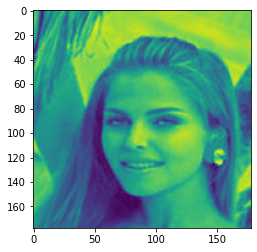

In [40]:
array_test_img_high = img_preprocess(test_imgs[0])
fig = plt.figure()
plt.imshow(array_test_img_high)
plt.show()

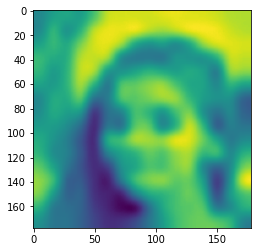

shape: (10, 178, 178)
type: <class 'numpy.ndarray'>
[[[0.40392157 0.40392157 0.40392157 ... 0.76078431 0.76078431 0.76078431]
  [0.40392157 0.40392157 0.40392157 ... 0.76078431 0.76078431 0.76078431]
  [0.40392157 0.40392157 0.40392157 ... 0.76078431 0.76078431 0.76078431]
  ...
  [0.44313725 0.44313725 0.43921569 ... 0.37254902 0.36862745 0.36862745]
  [0.43921569 0.43921569 0.43529412 ... 0.36862745 0.36470588 0.36470588]
  [0.43921569 0.43921569 0.43529412 ... 0.36862745 0.36078431 0.36078431]]

 [[0.27843137 0.27843137 0.27843137 ... 0.00784314 0.00784314 0.00784314]
  [0.27843137 0.27843137 0.27843137 ... 0.00784314 0.00784314 0.00784314]
  [0.27843137 0.27843137 0.27843137 ... 0.00784314 0.00784314 0.00784314]
  ...
  [0.05490196 0.05490196 0.05490196 ... 0.16078431 0.16078431 0.16078431]
  [0.05490196 0.05490196 0.05490196 ... 0.16470588 0.16470588 0.16470588]
  [0.05490196 0.05490196 0.05490196 ... 0.16470588 0.16470588 0.16470588]]

 [[0.98823529 0.98823529 0.98823529 ... 0.64

In [45]:
test_imgs_high_preprocessed = [img_preprocess(test_img, img_size_large) for test_img in test_imgs]
array_original_imgs = np.array(test_imgs_high_preprocessed)
test_imgs_low = [degrade_img(test_img) for test_img in test_imgs]
test_imgs_low_preprocessed = [img_preprocess(test_img, img_size_large, is_input_path=False) for test_img in test_imgs_low]
array_test_imgs = np.array(test_imgs_low_preprocessed)
fig = plt.figure()
plt.imshow(array_test_imgs[0])
plt.show()

fig.savefig(
    os.path.join(
        out_dir_path,
        'degraded.jpg'
    )
)
print('shape:', array_test_imgs.shape)
print('type:', type(array_test_imgs))
print(array_test_imgs)

## Super resolution

In [11]:
X_test_imgs = array_test_imgs.reshape((N_test_img, img_size_large*img_size_large))
pca_res = pca.transform(X_test_imgs)
restored_img_array = pca.inverse_transform(pca_res)

In [27]:
restored_img_array.shape[0]

10

In [36]:
rows = 2
def show_figs(img_array, figname='figs'):
    fig = plt.figure()
    cols = int(img_array.shape[0] / rows)
    axes = []
    fig = plt.figure()
    for i in range(rows*cols):
        img = img_array[i].reshape(img_size_large, img_size_large)
        axes.append(fig.add_subplot(rows, cols, i+1))
        plt.imshow(img)
    fig.tight_layout()
    plt.show()
    fig.savefig(
        os.path.join(
            out_dir_path,
            figname
        )
    )

<Figure size 432x288 with 0 Axes>

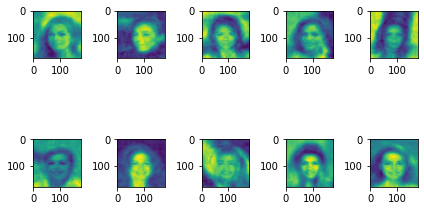

In [37]:
show_figs(restored_img_array, 'restored')

<Figure size 432x288 with 0 Axes>

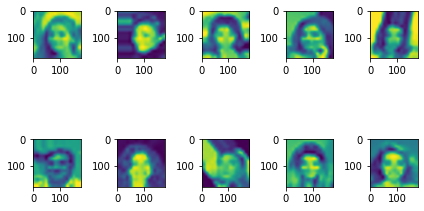

In [38]:
show_figs(X_test_imgs, 'degraded')

<Figure size 432x288 with 0 Axes>

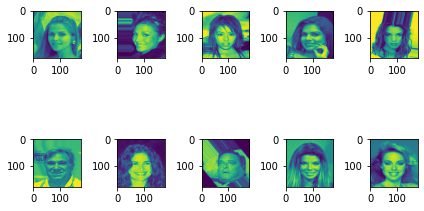

In [48]:
show_figs(array_original_imgs, 'original')

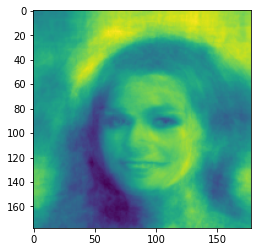

In [12]:
check_img = restored_img_array[0].reshape(img_size_large, img_size_large)
fig = plt.figure()
plt.imshow(check_img)
plt.show()
fig.savefig(
    os.path.join(
        out_dir_path,
        'super_resolution.jpg'
    )
)

## Prof Imai

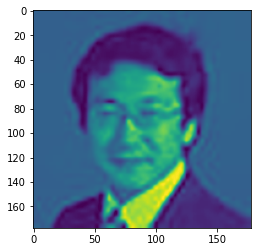

In [18]:
array_imai = img_preprocess('imai.jpg')
fig = plt.figure()
plt.imshow(array_imai)
plt.show()
fig.savefig(
    os.path.join(
        out_dir_path,
        'original_imai.jpg'
    )
)

In [14]:
X_imai = array_imai.reshape(img_size_large * img_size_large)
X_imai = X_imai[np.newaxis,:]
pca_res = pca.transform(X_imai)
restored_imai_array = pca.inverse_transform(pca_res)

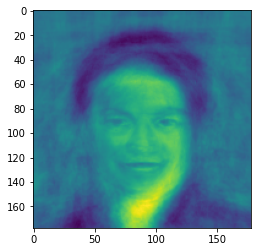

In [17]:
check_imai = restored_imai_array.reshape((img_size_large, img_size_large))
fig = plt.figure()
plt.imshow(check_imai)
plt.show()
fig.savefig(
    os.path.join(
        out_dir_path,
        'super_resolution_imai.jpg'
    )
)